**Big Mart Sales Prediction - Kumar Gaurav**

In [24]:
import pandas as pd
import numpy as np

In [25]:
# Load train and test datasets
train = pd.read_csv(r'C:\Users\613010670\Downloads\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\613010670\Downloads\test_AbJTz2l.csv')

print('Train shape:', train.shape)
print('Test shape:', test.shape)
train.head()

Train shape: (8523, 12)
Test shape: (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
# Check for percentage of missing values  for each column
print("For train")
print(train.isnull().sum()/len(train)*100)
print("For test")
print(test.isnull().sum()/len(test)*100)




For train
Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
For test
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


**These below 2 columns has missing values along with their percentage of miss in train and test respectievely**

**TRAIN**
**Item_Weight                  17.165317**
**Outlet_Size                  28.276428**
**TEST**
**Item_Weight                  17.180074**
**Outlet_Size                 28.269671**


**Check more on the pattern of missing data for each column starting with ITEM_WEIGHT first**

In [27]:
print(train[train['Item_Weight'].isnull()]['Item_Type'].value_counts())

Item_Type
Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: count, dtype: int64


**Result shows that- multiple item types have missing weights indicating a possible issue in the data collection**
**By Human intuition the best imputation technique could be imputing the item weight by mean of item_type**

In [28]:
# Group-wise imputation based on Item_Type considering train and test both

# Combine train and test datasets
train['source'] = 'train'
test['source'] = 'test'
combined = pd.concat([train, test], ignore_index=True)

# Impute Item_Weight based on combined data grouped by Item_Weight
combined['Item_Weight'] = combined.groupby('Item_Type')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)





**Continue analyzing  on the pattern of missing data for the next column  Outlet_Size**

In [29]:

# 2. Analyze missing pattern
print("Outlet_Size missing:", combined['Outlet_Size'].isnull().sum())
print("Outlet_Size values:", combined['Outlet_Size'].value_counts())

# 3. Check relationship with Outlet_Type
print(pd.crosstab(combined['Outlet_Type'], combined['Outlet_Size'], margins=True))

# Impute based on Outlet_Type
combined['Outlet_Size'] = combined.groupby('Outlet_Type')['Outlet_Size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Medium')
)

train = combined[combined['source'] == 'train'].drop('source', axis=1)
test = combined[combined['source'] == 'test'].drop('source', axis=1)


# Check if imputation was successful
print("Train Item_Weight missing:", train['Item_Weight'].isnull().sum())
print("Test Item_Weight missing:", test['Item_Weight'].isnull().sum())
print("Train Item_Weight missing:", train['Outlet_Size'].isnull().sum())
print("Test Item_Weight missing:", test['Outlet_Size'].isnull().sum())


Outlet_Size missing: 4016
Outlet_Size values: Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64
Outlet_Size        High  Medium  Small    All
Outlet_Type                                  
Grocery Store         0       0    880    880
Supermarket Type1  1553    1550   3100   6203
Supermarket Type2     0    1546      0   1546
Supermarket Type3     0    1559      0   1559
All                1553    4655   3980  10188
Train Item_Weight missing: 0
Test Item_Weight missing: 0
Train Item_Weight missing: 0
Test Item_Weight missing: 0


In [30]:
# Check missing data pattern
print(train['Outlet_Size'].value_counts())
print(train['Outlet_Size'].isnull().sum())

# See which outlets have missing sizes
print(train[train['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts())

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64
0
Series([], Name: count, dtype: int64)


In [31]:
# Basic statistics
print(train.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.846672         0.066132   140.992782                1997.831867   
std       4.232806         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.850000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


**Comprehensive EDA**

**Understanding Feature Distribution including target variable**

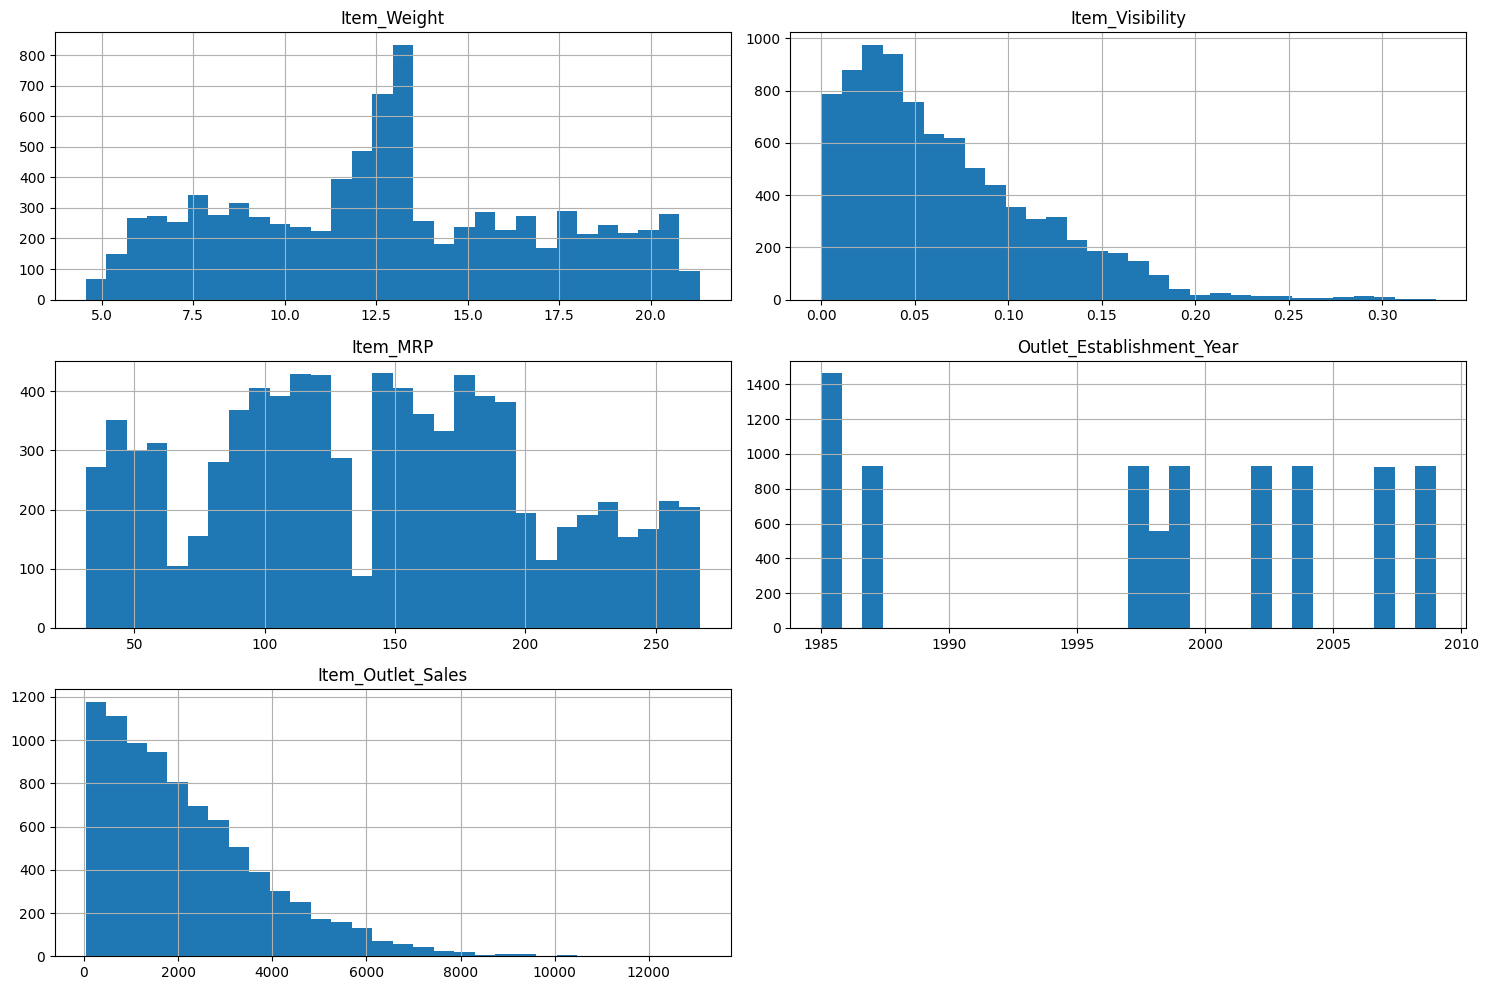

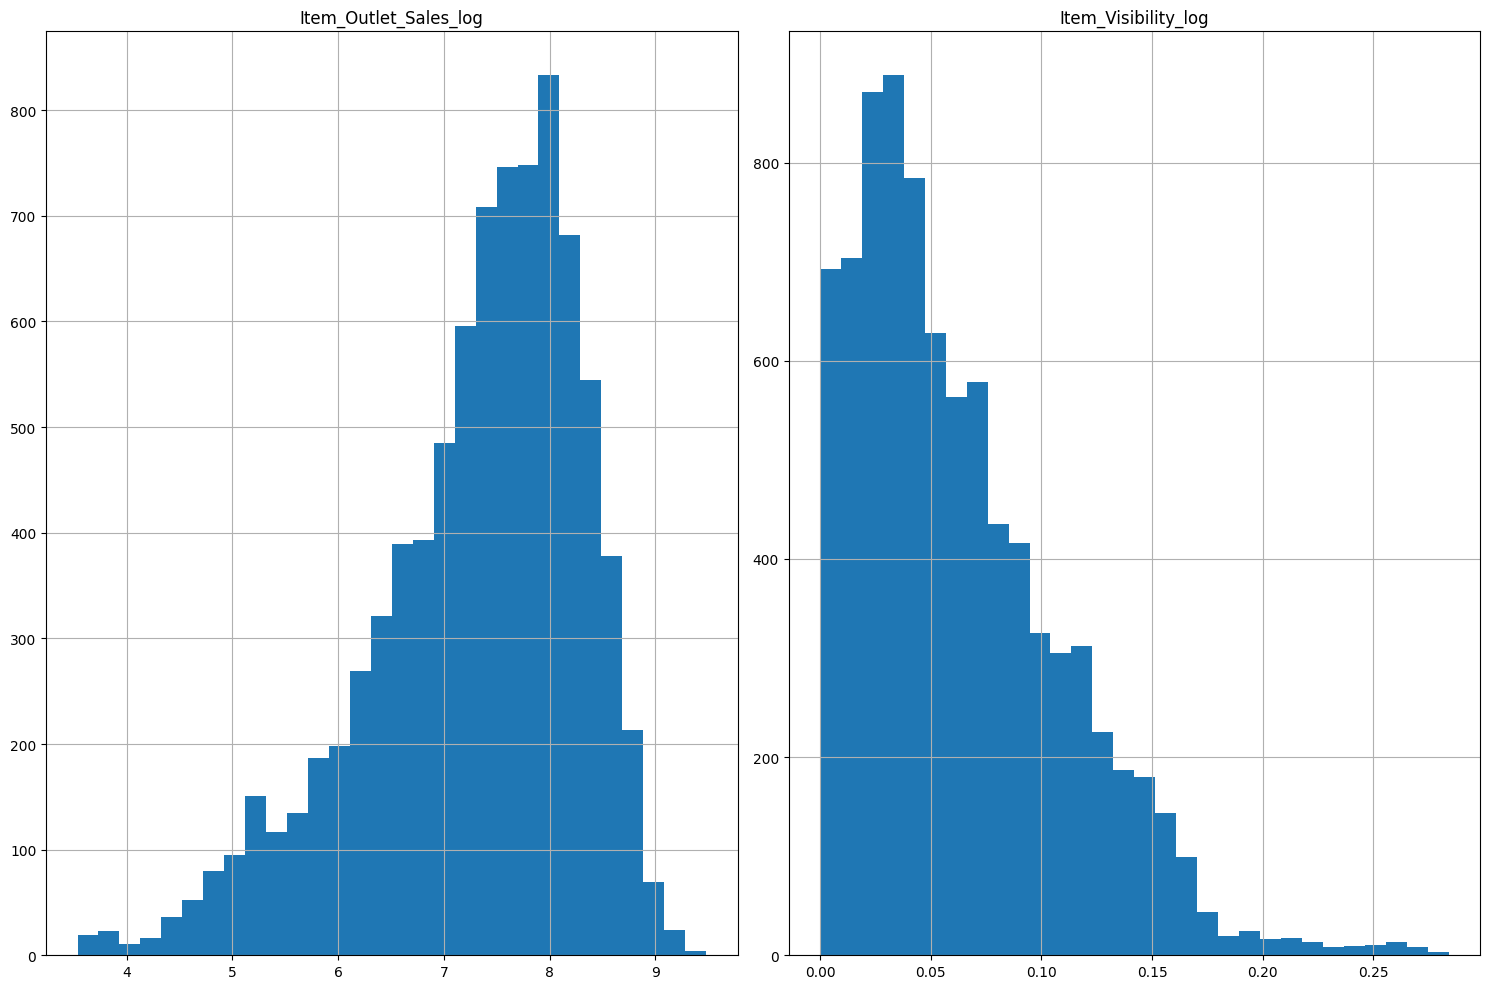

In [32]:

import matplotlib.pyplot as plt
# Numeric features
numeric_cols = train.select_dtypes(include=[np.number]).columns
train[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
# plt.show()


train['Item_Outlet_Sales_log'] = np.log1p(train['Item_Outlet_Sales'])
test['Item_Outlet_Sales_log'] = np.log1p(test['Item_Outlet_Sales'])
train['Item_Visibility_log'] = np.log1p(train['Item_Visibility'])
test['Item_Visibility_log'] = np.log1p(test['Item_Visibility'])

modified_cols=['Item_Outlet_Sales_log','Item_Visibility_log']
train[modified_cols].hist(figsize=(15, 10),bins=30)
plt.tight_layout()     
plt.show()



# # Categorical features
# categorical_cols = train.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     print(f"\n{col} value counts:")
#     print(train[col].value_counts())


**Introducing New Feature**
**Outlet Age**


In [33]:
current_year = 2025
train['Outlet_Age'] = current_year - train['Outlet_Establishment_Year']
test['Outlet_Age'] = current_year - test['Outlet_Establishment_Year']


In [34]:
# Create features on original DataFrames
train['Item_MRP_per_Weight'] = train['Item_MRP'] / (train['Item_Weight'] + 1)
train['Visibility_x_Age'] = train['Item_Visibility_log'] * train['Outlet_Age']
train['MRP_binned'] = pd.cut(train['Item_MRP'], bins=5, labels=[0,1,2,3,4])
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

# Same for test
test['Item_MRP_per_Weight'] = test['Item_MRP'] / (test['Item_Weight'] + 1)
test['Visibility_x_Age'] = test['Item_Visibility_log'] * test['Outlet_Age']
test['MRP_binned'] = pd.cut(test['Item_MRP'], bins=5, labels=[0,1,2,3,4])
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

# Update feature lists
numerical_features = ['Item_Weight', 'Item_MRP', 'Item_Visibility_log', 'Outlet_Age', 
                     'Item_MRP_per_Weight', 'Visibility_x_Age', 'MRP_binned']
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Re-encode and rebuild final arrays
# ... (repeat the encoding process with new features)


**Correlation Analysis**

Correlation with target:
Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_MRP_per_Weight          0.413811
Outlet_Age                   0.049135
Item_Weight                  0.011591
Outlet_Establishment_Year   -0.049135
Visibility_x_Age            -0.112847
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


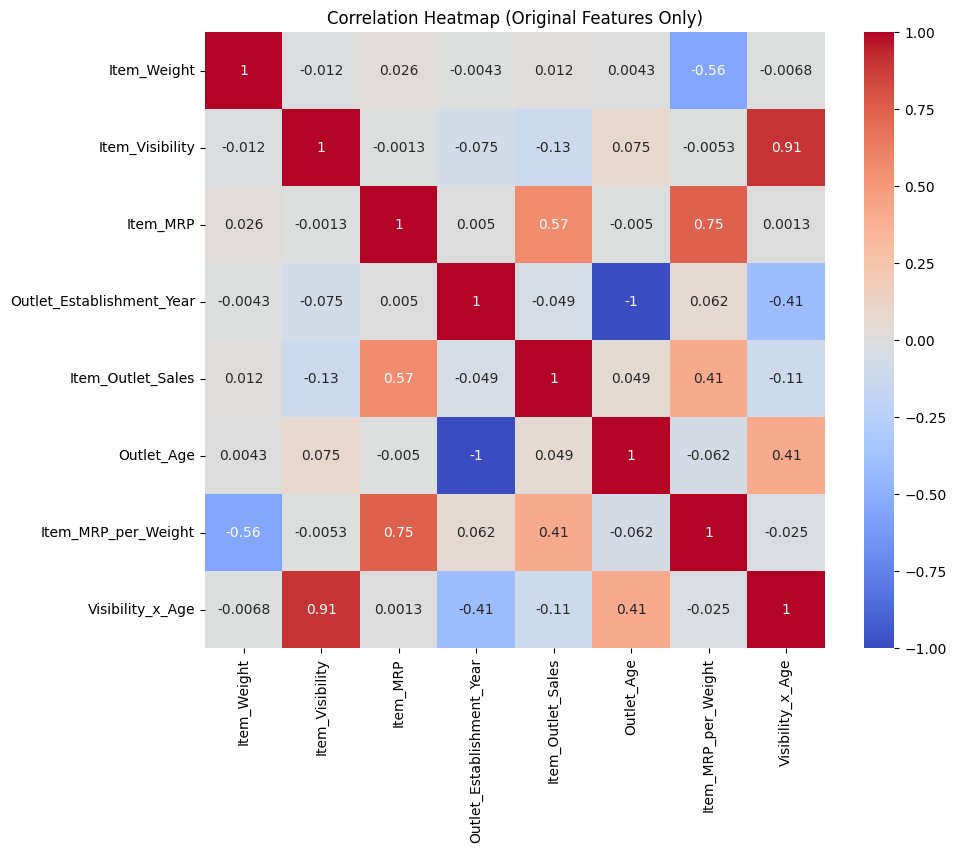

In [35]:
import seaborn as sns
# Remove log-transformed columns before correlation analysis
numerical_cols = train.select_dtypes(include=[np.number]).columns
cols_to_exclude = [col for col in numerical_cols if 'log' in col.lower()]
clean_numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

# Correlation with target (excluding log columns)
corr_with_target = train[clean_numerical_cols].corr()['Item_Outlet_Sales'].sort_values(ascending=False)
print("Correlation with target:")
print(corr_with_target)

# Correlation heatmap (excluding log columns)
plt.figure(figsize=(10, 8))
sns.heatmap(train[clean_numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Original Features Only)')
plt.show()


**Outlier Detection**

In [36]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply to key features
outliers_weight = detect_outliers(train, 'Item_Weight')
outliers_mrp = detect_outliers(train, 'Item_MRP')
print(f"Weight outliers: {len(outliers_weight)}")
print(f"MRP outliers: {len(outliers_mrp)}")


Weight outliers: 0
MRP outliers: 0


**Feature scaling**

In [37]:
# pip install scikit-learn

In [38]:
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_features)


['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Outlet_Sales_log', 'Item_Visibility_log', 'Outlet_Age', 'Item_MRP_per_Weight', 'Visibility_x_Age']


**Add Categorical Features**

In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Encode categorical features
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on combined data to ensure consistency
    combined_cat = pd.concat([train[col], test[col]]).astype(str)
    le.fit(combined_cat)
    
    # Transform both datasets
    train[f'{col}_encoded'] = le.transform(train[col].astype(str))
    test[f'{col}_encoded'] = le.transform(test[col].astype(str))
    
    le_dict[col] = le

# Combine numerical and encoded categorical features
numerical_features = ['Item_Weight', 'Item_MRP', 'Item_Visibility_log', 'Outlet_Age']
encoded_features = [f'{col}_encoded' for col in categorical_cols]
all_features = numerical_features + encoded_features

# Scale only numerical features
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train[numerical_features])
test_numerical_scaled = scaler.transform(test[numerical_features])

# Combine scaled numerical + encoded categorical
X_train_final = np.hstack([train_numerical_scaled, train[encoded_features].values])
X_test_final = np.hstack([test_numerical_scaled, test[encoded_features].values])

print(f"Final feature count: {X_train_final.shape[1]}")


Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Final feature count: 11


**Trying Linear Regression to start with**

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data
X = X_train_final  # Combined scaled numerical + encoded categorical features
y = train['Item_Outlet_Sales_log']  # Log-transformed target

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Convert back to original scale for interpretation
y_val_orig = np.expm1(y_val)
y_pred_orig = np.expm1(y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))

print(f"RMSE (original scale): {rmse_orig:.2f}")


RMSE: 0.6581
R² Score: 0.5881
RMSE (original scale): 1297.25


**Generating the submissible result**

In [41]:
# Predict on test set with improved model
test_predictions_log = lr_model.predict(X_test_final)
test_predictions = np.expm1(test_predictions_log)

# Create submission
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'], 
    'Item_Outlet_Sales': test_predictions
})

print("Sample predictions:")
print(submission.head())
print(f"\nPrediction range: ${test_predictions.min():.2f} - ${test_predictions.max():.2f}")

# Save improved submission
submission.to_csv('improved_linear_regression_submission.csv', index=False)
print("Submission saved!")


Sample predictions:
     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
8523           FDW58            OUT049        1912.651557
8524           FDW14            OUT017         804.860031
8525           NCN55            OUT010         933.187799
8526           FDQ58            OUT017        1426.315546
8527           FDY38            OUT027        6310.670671

Prediction range: $137.85 - $9221.72
Submission saved!


**Installing xgboost**

In [42]:
# pip install xgboost

**Trying advanced models like RandomForestRegressor and XGBRegressor**

In [43]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse:.4f}")


Random Forest RMSE: 0.5464
XGBoost RMSE: 0.5587


**Random Forest and XGBoost both showed better performance than Linear Regression ,now trying with Ensemble of them**

In [44]:
# Ensemble prediction (combine all 3 models)
ensemble_pred = (rf_pred + xgb_pred + y_pred) / 3
ensemble_rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

# Use Random Forest for final submission (best single model)
rf_test_pred_log = rf_model.predict(X_test_final)
rf_test_pred = np.expm1(rf_test_pred_log)

# Create submission
rf_submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'], 
    'Item_Outlet_Sales': rf_test_pred
})

rf_submission.to_csv('random_forest_submission.csv', index=False)
print("Random Forest submission saved!")
print(f"Expected test RMSE: ~{np.expm1(0.5449):.0f}")


Ensemble RMSE: 0.5439
Random Forest submission saved!
Expected test RMSE: ~1


**Tune xgBoost a bit**

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# XGBoost tuning
xgb_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, n_iter=10)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_


**Tune RandomForestRegression too and then try predicting using ensemble of RF and XGB**

In [ ]:
# Train tuned models
rf_tuned = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
rf_tuned.fit(X_train, y_train)

# Step 3: Advanced Ensemble
rf_pred = rf_tuned.predict(X_val)
xgb_pred = best_xgb.predict(X_val)


# Final ensemble prediction
rf_test_pred = rf_tuned.predict(X_test_final)
xgb_test_pred = best_xgb.predict(X_test_final)
ensemble_test_pred = 0.6 * rf_test_pred + 0.4 * xgb_test_pred

# Convert back to original scale
final_predictions = np.expm1(ensemble_test_pred)

# Create submission
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'], 
    'Item_Outlet_Sales': final_predictions
})

submission.to_csv('advanced_ensemble_submission.csv', index=False)
print("Advanced ensemble submission saved!")

CV RMSE: 0.5405 ± 0.0092
Advanced ensemble submission saved!


**Now try xgboost with more advanced features and k-fold cross validation**

In [ ]:
catboost

In [ ]:

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# Load combined
train = pd.read_csv(r'C:\Users\613010670\Downloads\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\613010670\Downloads\test_AbJTz2l.csv')

# Combine for preprocessing
train['source'] = 'train'
test['source'] = 'test'
combined = pd.concat([train, test], ignore_index=True)

# Advanced preprocessing
combined['Item_Fat_Content'] = combined['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
non_food = ['NC', 'DR']
combined.loc[combined['Item_Identifier'].str[:2].isin(non_food), 'Item_Fat_Content'] = 'Non-Edible'

# Better imputation of item_weight using item-specific means
item_weight_mean = combined.groupby('Item_Identifier')['Item_Weight'].transform('mean')
combined['Item_Weight'] = combined['Item_Weight'].fillna(item_weight_mean)
combined['Item_Weight'] = combined['Item_Weight'].fillna(combined['Item_Weight'].mean())

#  Better imputation of Outlet_Size using outlet_type means
for outlet_type in combined['Outlet_Type'].unique():
    mask = (combined['Outlet_Type'] == outlet_type) & (combined['Outlet_Size'].isnull())
    mode_val = combined[combined['Outlet_Type'] == outlet_type]['Outlet_Size'].mode()
    if len(mode_val) > 0:
        combined.loc[mask, 'Outlet_Size'] = mode_val[0]
combined['Outlet_Size'].fillna('Medium', inplace=True)

# Deal with 0s in item visibility as they may be data recording/collection issue
combined['Item_Visibility'] = combined['Item_Visibility'].replace(0, np.nan)
combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))
combined['Item_Visibility'].fillna(combined['Item_Visibility'].mean(), inplace=True)

# Target encoding for high cardinality features (only on train)
train_combined = combined[combined['source'] == 'train'].copy()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Target encode Item_Identifier one of the high cardinality feature
combined['Item_Identifier_TE'] = 0
for train_idx, val_idx in kf.split(train_combined):
    train_fold = train_combined.iloc[train_idx]
    val_fold = train_combined.iloc[val_idx]
    te_map = train_fold.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
    combined.loc[combined.index.isin(val_fold.index), 'Item_Identifier_TE'] = combined.loc[combined.index.isin(val_fold.index), 'Item_Identifier'].map(te_map)

# Fill test with overall mean
overall_te = train_combined.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
test_mask = combined['source'] == 'test'
combined.loc[test_mask, 'Item_Identifier_TE'] = combined.loc[test_mask, 'Item_Identifier'].map(overall_te)
combined['Item_Identifier_TE'].fillna(train_combined['Item_Outlet_Sales'].mean(), inplace=True)

# Target encode Outlet_Identifier other  high cardinality feature
combined['Outlet_Identifier_TE'] = 0
for train_idx, val_idx in kf.split(train_combined):
    train_fold = train_combined.iloc[train_idx]
    val_fold = train_combined.iloc[val_idx]
    te_map = train_fold.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
    combined.loc[combined.index.isin(val_fold.index), 'Outlet_Identifier_TE'] = combined.loc[combined.index.isin(val_fold.index), 'Outlet_Identifier'].map(te_map)

overall_te_outlet = train_combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
combined.loc[test_mask, 'Outlet_Identifier_TE'] = combined.loc[test_mask, 'Outlet_Identifier'].map(overall_te_outlet)
combined['Outlet_Identifier_TE'].fillna(train_combined['Item_Outlet_Sales'].mean(), inplace=True)

# Advanced feature engineering
combined['Item_Type_Combined'] = combined['Item_Identifier'].str[:2]
combined['Outlet_Age'] = 2025 - combined['Outlet_Establishment_Year']
combined['Item_MRP_per_Weight'] = combined['Item_MRP'] / combined['Item_Weight']
combined['Item_Visibility_MeanRatio'] = combined['Item_Visibility'] / combined.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
combined['Item_MRP_Clusters'] = pd.cut(combined['Item_MRP'], bins=10, labels=False)
combined['Item_Weight_Clusters'] = pd.cut(combined['Item_Weight'], bins=10, labels=False)
combined['MRP_Visibility'] = combined['Item_MRP'] * combined['Item_Visibility']
combined['Weight_Visibility'] = combined['Item_Weight'] * combined['Item_Visibility']
combined['MRP_Weight'] = combined['Item_MRP'] * combined['Item_Weight']
combined['Outlet_Age_MRP'] = combined['Outlet_Age'] * combined['Item_MRP']
combined['Item_MRP_Outlet_Type'] = combined['Item_MRP'] * combined['Outlet_Type'].astype('category').cat.codes
combined['Visibility_Outlet_Size'] = combined['Item_Visibility'] * combined['Outlet_Size'].astype('category').cat.codes
combined['MRP_squared'] = combined['Item_MRP'] ** 2
combined['Weight_squared'] = combined['Item_Weight'] ** 2
combined['Visibility_log'] = np.log1p(combined['Item_Visibility'])
combined['MRP_log'] = np.log1p(combined['Item_MRP'])

combined['MRP_Weight_Ratio'] = combined['Item_MRP'] / (combined['Item_Weight'] + 1)
combined['Visibility_Weight_Ratio'] = combined['Item_Visibility'] / (combined['Item_Weight'] + 1)
combined['MRP_Visibility_Weight'] = combined['Item_MRP'] * combined['Item_Visibility'] * combined['Item_Weight']
combined['Outlet_Age_squared'] = combined['Outlet_Age'] ** 2
combined['Item_MRP_sqrt'] = np.sqrt(combined['Item_MRP'])
combined['Item_Weight_log'] = np.log1p(combined['Item_Weight'])
combined['Visibility_MRP_Ratio'] = combined['Item_Visibility'] / (combined['Item_MRP'] + 1)

# Outlet-Item interaction features
combined['Outlet_Item_Mean_MRP'] = combined.groupby(['Outlet_Identifier', 'Item_Type'])['Item_MRP'].transform('mean')
combined['Outlet_Item_Mean_Weight'] = combined.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Weight'].transform('mean')
combined['Item_Outlet_Count'] = combined.groupby(['Item_Identifier', 'Outlet_Identifier']).cumcount() + 1

# Label encoding for categorical variables
le_dict = {}
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']

for col in cat_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
    le_dict[col] = le

# Split back
train_processed = combined[combined['source'] == 'train'].drop('source', axis=1)
test_processed = combined[combined['source'] == 'test'].drop(['source', 'Item_Outlet_Sales'], axis=1)

# Enhanced feature set with all advanced features
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
           'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
           'Item_Type_Combined', 'Outlet_Age', 'Item_MRP_per_Weight', 'Item_Visibility_MeanRatio',
           'Item_MRP_Clusters', 'Item_Weight_Clusters', 'MRP_Visibility', 'Weight_Visibility',
           'MRP_Weight', 'Outlet_Age_MRP', 'Item_Identifier_TE', 'Outlet_Identifier_TE',
           'Item_MRP_Outlet_Type', 'Visibility_Outlet_Size', 'MRP_squared', 'Weight_squared',
           'Visibility_log', 'MRP_log', 'MRP_Weight_Ratio', 'Visibility_Weight_Ratio',
           'MRP_Visibility_Weight', 'Outlet_Age_squared', 'Item_MRP_sqrt', 'Item_Weight_log',
           'Visibility_MRP_Ratio', 'Outlet_Item_Mean_MRP', 'Outlet_Item_Mean_Weight', 'Item_Outlet_Count']

X = train_processed[features]
y = train_processed['Item_Outlet_Sales']
X_test = test_processed[features]

# Advanced stacking ensemble with diverse models
models = {
    'xgb1': xgb.XGBRegressor(n_estimators=3000, max_depth=6, learning_rate=0.005, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.05, random_state=42),
    'xgb2': xgb.XGBRegressor(n_estimators=2000, max_depth=8, learning_rate=0.01, subsample=0.85, colsample_bytree=0.85, reg_lambda=0.1, random_state=123),
    'lgb1': lgb.LGBMRegressor(n_estimators=3000, max_depth=7, learning_rate=0.005, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, random_state=42),
    'lgb2': lgb.LGBMRegressor(n_estimators=2500, max_depth=9, learning_rate=0.008, subsample=0.85, colsample_bytree=0.9, reg_lambda=0.05, random_state=123),
    'rf': RandomForestRegressor(n_estimators=1000, max_depth=25, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'et': ExtraTreesRegressor(n_estimators=800, max_depth=20, min_samples_split=3, random_state=42),
    'ridge': Ridge(alpha=5)
}


# Stacking predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stacking_train = np.zeros((X.shape[0], len(models)))
stacking_test = np.zeros((X_test.shape[0], len(models)))

for i, (name, model) in enumerate(models.items()):
    test_preds = []
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        stacking_train[val_idx, i] = model.predict(X_val_fold)
        test_preds.append(model.predict(X_test))
    
    stacking_test[:, i] = np.mean(test_preds, axis=0)

# Meta-learner
meta_model = Ridge(alpha=1)
meta_model.fit(stacking_train, y)
predictions = meta_model.predict(stacking_test)
predictions = np.maximum(predictions, 0)

# Create submission
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': predictions
})

submission.to_csv(r'C:\Users\613010670\Downloads\final_submission.csv', index=False)
print("Final advanced ensemble submission saved!")
print(f"Predictions range: {predictions.min():.2f} to {predictions.max():.2f}")

